# 2D Project

## Student's Name:
- Boey Sze Min, Jeanelle (1006037)
- Joash Tan Jia Le (1005862)
- Keith Chua Dian-Xun (1005880)
- Wong Wei Jin Justin (1006001)

## Contributions:
- Boey Sze Min, Jeanelle (1006037)
    - sdiifs
- Joash Tan Jia Le (1005862)
- Keith Chua Dian-Xun (1005880)
- Wong Wei Jin Justin (1006001)

# TO DO

### Overview About the Problem

Describe here the problem you are trying to solve.

## What is Food Security? 

According to the United Nations' (UN) Committee on World Food Security, food security is defined as people, "at all times", having "Physical, Social, and Economic" access to "sufficient, safe and nutritious food" that meets their "dietary needs for an active and healthy life" (FAO, 1996). 

 

## Problem Statement 

In line with the definition of Food security provided by UN, we have decided to find out how physical, social, and economic factors have affected the dietary requirements for an active and healthy lifestyle of the population of each country. As a result, we have come up with the following problem statement: “How might we predict whether the dietary needs for individuals are met for each country, considering a country’s economy, and its citizen’s social and physical environment?” 

### Datasets

We have obtained the following raw data for all the countries over a few years:
1. GDP per capita, adjusted for PPP (USD):   
   Link: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD   
   CSV file name: "DDW_GDP per capita adjusted.csv"   

2. Amount of agricultural land allocated per countries ($km^{2}$):   
   Link: https://data.worldbank.org/indicator/AG.LND.AGRI.K2?name_desc=false    
   CSV file name: "DDW_Agricultural Land.csv"   

3. Percentage of population with access to basic drinking water (%):   
   Link: https://www.kaggle.com/datasets/utkarshxy/who-worldhealth-statistics-2020-complete?select=basicDrinkingWaterServices.csv    
   CSV file name: "DDW_Basic Water Drinking Services.csv"   

4. $CO_{2}$ emitted in each country (million metric tonnes):   
   Link: https://github.com/owid/co2-data   
   CSV file name: "DDW_CO2.csv"   

5. Percentage of population with eating disorder (%):    
   Link: https://ourworldindata.org/grapher/share-with-an-eating-disorder    
   CSV file name: "DDW_Eating Disorder.csv"   

6. Number of people employed in agriculture, forestry and fisheries:   
   Link: https://www.fao.org/faostat/en/#data/OEA    
   CSV file name: "DDW_Employment In Agriculture.csv"   

7. Population of each country:   
   Link: https://github.com/owid/co2-data    
   CSV file name: "DDW_Population.csv"   

8. Daily calories supplied (kcal/capita day):   
   Link: https://ourworldindata.org/food-supply   
   CSV file name: "DDW_Food Supply.csv"   

9. Minimum dietary calories requirement (kcal/capita day):   
   Link: https://www.fao.org/faostat/en/#data/FS   
   CSV file name: "DDW_Min Cal Intake.csv"   

10. Fat supplied (g/capita day):   
   Link: https://ourworldindata.org/food-supply   
   CSV file name: "DDW_Fat and Protein Supply.csv"   

11. Protein supplied (g/capita day):   
   Link: https://ourworldindata.org/food-supply   
   CSV file name: "DDW_Fat and Protein Supply.csv"   

12. Percent of population malnourished:     
   Link: https://ourworldindata.org/hunger-and-undernourishment#:~:text=across%20the%20world.-,Summary,million%20people%20globally%20are%20undernourished   
   CSV file name: "DDW_Prevalence of Undernourishment.csv"   

The code below extracts the relevant data from each file and processses it to match our 6 factors.

For **model 1**, the 6 factors that we are using to predict food security are:
1. GDP per capita, adjusted for PPP (USD)
2. Agricultural land per capita ($km^{2}$ per capita)
3. Percentage of population with basic water service (%)
4. Percentage of population with eating disorder (%)
5. Percentage of population employed in agriculture forestry fishery (%)
6. $CO_{2}$ emitted per agricultural land area (kg/$m^{2}$)   

For our dependent value we will be calculating whether the calorie supplied per capita per day is greater or less than the minimum calories required per capita per day, we will be naming this our _**Y Ratio**_.
$$
 \text{Y Ratio} = \frac{\text{Daily calories supplied (kcal/capita day)}}{\text{Minimum calories required (kcal/capita day)}}
$$

If _Y ratio_ ${<}$ 1, we say that the daily calories supplied is not sufficient to meet the minimum calories required.   
If _Y ratio_ ${>}$ 1, we say that the daily calories supplied is sufficient to meet the minimum calories required.



In [1331]:
# put Python code to read and describe your data

## Imports

In [1332]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## $1^{st}$ Model

### Cleaning the data for $1^{st}$ model

- Store the specified year that we want from the csv as get_year.

In [1333]:
# set the year to extract
get_year = 2017

Extracting the code requires us to look at the csv beforehand and understand how the csv is structured.   
Cleaning up the csv and obtaining what we wanted follows the folloiwng similar steps.
1. Read the csv
2. drop NaN values
3. Extract values from the specified year in _get_year_
4. Extract values that we want
5. Rename the columns for easy understanding
6. Reset the index to 0
7. Find unique countries for use later
8. Print the dataframe for us to get a preview

#### Extract calories supplied data for the specified year

In [1334]:
# read calories supply csv
df_calories = pd.read_csv("DDW_food Supply.csv")
# extract values only when item is "Grand Total"
df_calories = df_calories[(df_calories["Item"] == "Grand Total")]
# extract specified year values
df_calories = df_calories[(df_calories["Year"]==get_year)]
# extract year, country and calories supply
df_calories = df_calories[["Year", "Area", "Value"]]
df_calories = df_calories.rename(columns = {"Area": "Country", "Value": "Calories_supply"})
# set index from 0
df_calories = df_calories.reset_index(drop=True)
# find unique countries in calories supply data
df_calories_countries = df_calories.Country.unique()
# print dataframe
## df_calories

#### Extract minimum calorie intake required data for the specified year

In [1335]:
# read minimum calorie intake csv
df_min_cal = pd.read_csv("DDW_Min Cal Intake.csv")
# extract values that are not missing
df_min_cal = df_min_cal[df_min_cal["Value"].notna()]
# extract specified year values
df_min_cal = df_min_cal[(df_min_cal["Year"]==get_year)]
# extract year, country and values
df_min_cal = df_min_cal[["Year", "Area", "Value"]]
df_min_cal = df_min_cal.rename(columns = {"Area": "Country", "Value":"Mininum_calorie_intake"})
# set index from 0
df_min_cal = df_min_cal.reset_index(drop=True)
# find unique countries in miniumum calorie intake required data
df_min_cal_countries = df_min_cal.Country.unique()
# print dataframe
## df_min_cal

#### Extract GDP, adjusted for PPP, per capita data for the specified year

In [1336]:
# read GDP, adjusted for PPP, per capita csv
df_GDP = pd.read_csv("DDW_GDP per capita adjusted.csv")
# extract values that are not missing
df_GDP = df_GDP[(df_GDP["Value"].notna())]
# extract specified year values
df_GDP = df_GDP[(df_GDP["Year"]==get_year)]
# extract year, country and values
df_GDP = df_GDP[["Year","Area","Value"]]
df_GDP = df_GDP.rename(columns = {"Area": "Country", "Value":"GDP"})
# set index from 0
df_GDP = df_GDP.reset_index(drop=True)
# find unique countries in GDP per capita data
df_GDP_countries = df_GDP.Country.unique()
# print data frame
## df_GDP

#### Extract total population data for the specified year

In [1337]:
# read total population employed csv
df_pop = pd.read_csv("DDW_Population.csv")
# extract specified year values
df_pop = df_pop[(df_pop["year"]==get_year)]
# extract values that are not missing
df_pop = df_pop[df_pop["population"].notna()]
# extract year, country and population value
df_pop = df_pop[["year", "country", "population"]]
df_pop = df_pop.rename(columns = {"year": "Year", "country": "Country", "population":"Population"})
# set index from 0
df_pop = df_pop.reset_index(drop=True)
# find unique countries in total population data
df_pop_coutries = df_pop.Country.unique()
# print dataframe
## df_pop

#### Extract land area used for agriculture data for the specified year

In [1338]:
# read agricultural land csv
df_agri = pd.read_csv("DDW_Agricultural Land.csv")
# extract countries and specified year
df_agri = df_agri[["Country Name", str(get_year)]]
# remove rows with values missing
df_agri = df_agri.dropna()
# insert new column at index 0 with name "Year" and value: get_year
df_agri.insert(0, "Year", get_year)
df_agri = df_agri.rename(columns = {str(get_year): "Agri_land", "Country Name": "Country"})
# find unique countries in agricultural land
df_agri_countries = df_agri.Country.unique()
# print dataframe
## df_agri

#### Extract $CO_{2}$ (in million metric tonnes) data for the specified year

In [1339]:
# read CO2 csv
df_co2 = pd.read_csv("DDW_CO2.csv")
# extract specified year values
df_co2 = df_co2[(df_co2["year"]==get_year)]
# extract values that are not missing
df_co2 = df_co2[df_co2["co2"].notna()]
# extract year, country and values
df_co2 = df_co2[["year","country","co2"]]
df_co2 = df_co2.rename(columns = {"year": "Year", "country": "Country", "co2": "CO2"})
# set index from 0
df_co2 = df_co2.reset_index(drop=True)
# find unique countries in total co2 data
df_co2_countries = df_co2.Country.unique()
# print dataframe
## df_co2

#### Extract basic water drinking services data for the specified year

In [1340]:
# read Basic Water Drinking Services csv
df_water = pd.read_csv("DDW_Basic Water Drinking Services.csv")
# extract values that are not missing
df_water = df_water[df_water["Value"].notna()]
# extract specified year values
df_water = df_water[(df_water["Year"]==get_year)]
# extract year, country and values
df_water = df_water[["Year", "Area", "Value"]]
df_water = df_water.rename(columns = {"Area": "Country", "Value": "Basic_water"})
# set index from 0
df_water = df_water.reset_index(drop=True)
# find unique countries in total water data
df_water_countries = df_water.Country.unique()
# print dataframe
## df_water

#### Extract Eating Disorder data for the specified year

In [1341]:
# read eating disorder csv
df_disorder = pd.read_csv("DDW_Eating Disorder.csv")
# extract values that are not missing
df_disorder = df_disorder[df_disorder["Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)"].notna()]
df_disorder = df_disorder.rename(columns = {"Entity": "Country", "Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)":"Prevalence"})
# extract specified year values
df_disorder = df_disorder[(df_disorder["Year"]==get_year)]
# extract year, country and values
df_disorder = df_disorder[["Year", "Country", "Prevalence"]]
df_disorder = df_disorder.rename(columns = {"Prevalence": "Eating_disorder"})
# set index from 0
df_disorder = df_disorder.reset_index(drop=True)
# find unique countries in eating disorder data
df_disorder_countries = df_disorder.Country.unique()
# print dataframe
## df_disorder

#### Extract number of people employed in agriculture data for the specified year

In [1342]:
# read employment csv
df_employment = pd.read_csv("DDW_Employment In Agriculture.csv")
# extract values that are not missing
df_employment = df_employment[df_employment["Value"].notna()]
# extract specified year values
df_employment = df_employment[(df_employment["Year"]==get_year)]
# extract year, country and values
df_employment = df_employment[["Year", "Area", "Value"]]
# multiply by 1000 to find actual number employed (units was in 1000 people)
df_employment["Value"] = df_employment["Value"]*1000
df_employment = df_employment.rename(columns = {"Area": "Country", "Value":"Employed_num"})
# set index from 0
df_employment = df_employment.reset_index(drop=True)
# find unique countries in eating disorder data
df_employment_countries = df_employment.Country.unique()
# print dataframe
## df_employment

#### Create list of common countries

Find the countries that we have all the data for as we do not want to use countries with missing values.

In [1343]:
# cc represent common countries
set1 = set(df_calories_countries)
set2 = set(df_min_cal_countries)
set3 = set(df_GDP_countries)
set4 = set(df_pop_coutries)
set5 = set(df_agri_countries)
set6 = set(df_co2_countries)
set7 = set(df_water_countries)
set8 = set(df_disorder_countries)
set9 = set(df_employment_countries)

cc1 = list(set1 & set2 & set3 & set4 & set5 & set6 & set7 & set8 & set9)
print("Common Countries", cc1, "\n", "Length", len(cc1))

Common Countries ['Netherlands', 'Costa Rica', 'France', 'Ireland', 'Algeria', 'Georgia', 'Kuwait', 'Slovenia', 'Peru', 'Belarus', 'Portugal', 'Uzbekistan', 'Togo', 'Seychelles', 'Nepal', 'Jordan', 'Uganda', 'Iceland', 'Afghanistan', 'Estonia', 'Denmark', 'Australia', 'Jamaica', 'Belgium', 'Mauritania', 'Cyprus', 'Luxembourg', 'Azerbaijan', 'Canada', 'Samoa', 'Czechia', 'Lithuania', 'El Salvador', 'Dominican Republic', 'Armenia', 'Austria', 'Finland', 'Spain', 'Kazakhstan', 'Mexico', 'Uruguay', 'Rwanda', 'Djibouti', 'Japan', 'South Africa', 'Tunisia', 'Ukraine', 'Switzerland', 'New Zealand', 'Colombia', 'Romania', 'Ghana', 'Norway', 'Hungary', 'Burundi', 'Thailand', 'Barbados', 'Israel', 'Sri Lanka', 'Malta', 'Honduras', 'Serbia', 'Cambodia', 'Latvia', 'Sweden', 'Guatemala', 'Belize', 'Chile', 'Bulgaria', 'Philippines', 'Malaysia', 'Mauritius', 'Mongolia', 'Panama', 'Bangladesh', 'United Arab Emirates', 'Germany', 'Albania', 'Italy', 'Ecuador', 'Mali', 'Myanmar', 'Greece', 'Brazil', 'I

#### Calculating and Combining our dataframes according to our combined countries

We will start by calculating the necessary dependent values first before we fully combine.

#### Calculate Y ratio 
$$
\frac{\text{Daily calories supplied (kcal/capita day)}}{\text{Minimum calories required (kcal/capita day)}}
$$


In [1344]:
# extract values from countries in combined countries list
df_calories_cc = df_calories[df_calories["Country"].isin(cc1)]
df_min_cal_cc = df_min_cal[df_min_cal["Country"].isin(cc1)]

df_y_ratio = df_calories_cc.copy()
# extract minimum calorie value
df_y_ratio["Mininum_calorie_intake"] = list(df_min_cal_cc["Mininum_calorie_intake"])
# calculate Y ratio based on stated equation
df_y_ratio["y_ratio"] = df_y_ratio["Calories_supply"]/df_y_ratio["Mininum_calorie_intake"]
# set index from 0
df_y_ratio = df_y_ratio.reset_index(drop=True)
# print dataframe
## df_y_ratio

#### Calculate Agriculture Land per capita ($\textrm{m}^2$ per capita)

In [1345]:
# extract values from countries in combined countries list
df_agri_cc = df_agri[df_agri["Country"].isin(cc1)]
df_pop_cc = df_pop[df_pop["Country"].isin(cc1)]

df_agri_pop = df_agri_cc.copy()
# extract population value
df_agri_pop["Total_population"] = list(df_pop_cc["Population"])
# calculate agriculture land per capita, multiply by 1,000,000 to convert km^2 to m^2
df_agri_pop["Agri_land_cap"] = (df_agri_pop["Agri_land"]/df_agri_pop["Total_population"])*1000000
# set index from 0
df_agri_pop = df_agri_pop.reset_index(drop=True)
# print dataframe
## df_agri_pop

#### Calculate percentage of population employed in the agriculture industry (%)

In [1346]:
# extract values from countries in combined countries list
df_employment_cc = df_employment[df_employment["Country"].isin(cc1)]
df_pop_cc = df_pop[df_pop["Country"].isin(cc1)]


df_percent_employed = df_employment_cc.copy()
# extract population value
df_percent_employed["Total_population"] = list(df_pop_cc["Population"])
# calculate percent employed; (employed number/total population) for each country
df_percent_employed["Employed_%"] = (df_percent_employed["Employed_num"]/df_percent_employed["Total_population"])*100
# set index from 0
df_percent_employed = df_percent_employed.reset_index(drop=True)
# print dataframe
## df_percent_employed

#### Calculate $CO_{2}$ per agricultural land (kg per $m^{2}$)

In [1347]:
# extract values from countries in combined countries list
df_co2_cc = df_co2[df_co2["Country"].isin(cc1)]
df_agri_cc = df_agri[df_agri["Country"].isin(cc1)]


df_co2_land = df_co2_cc.copy()
# extract Agricultural land in km^2
df_co2_land["Agri_land"] = list(df_agri_cc["Agri_land"])
# calculate CO2 per agricultral land; CO2 in MMT, 1 MMT = 1,000,000,000 kg
# 1 km^2 = 1,000,000 m^2; result in kg per m^2
df_co2_land["CO2_agri"] = (df_co2_land["CO2"]/df_co2_land["Agri_land"])*1000
# set index from 0
df_co2_land = df_co2_land.reset_index(drop=True)
# print dataframe
## df_co2_land

#### Extracting the rest of the dataframes needed by countries that are within the combined countries list

In [1348]:
# extract GDP value from countries in combined countries list
df_GDP_cc = df_GDP[df_GDP["Country"].isin(cc1)]
# set index from 0
df_GDP_cc = df_GDP_cc.reset_index(drop=True)

# extract water value from countries in combined countries list
df_water_cc = df_water[df_water["Country"].isin(cc1)]
# set index from 0
df_water_cc = df_water_cc.reset_index(drop=True)

# extract eating disorder value from countries in combined countries list
df_disorder_cc = df_disorder[df_disorder["Country"].isin(cc1)]
# set index from 0
df_disorder_cc = df_disorder_cc.reset_index(drop=True)

# print dataframe to check if need be
# df_GDP_cc
# df_water_cc
# df_disorder_cc

#### Combining all the variables into one dataframe

In [1349]:
# add country and Y ratio column
dfyears_combined_model1 = df_y_ratio.loc[:, ["Country", "y_ratio"]]
# add GDP column
dfyears_combined_model1["GDP"] = df_GDP_cc.loc[:, "GDP"]
# add agriculture per land column
dfyears_combined_model1["Agri_land_cap"] = df_agri_pop.loc[:, "Agri_land_cap"]
# add percent basic water service column
dfyears_combined_model1["Basic_water"] = df_water_cc.loc[:, "Basic_water"]
# add percent eating disorder column
dfyears_combined_model1["Eating_disorder"] = df_disorder_cc.loc[:, "Eating_disorder"]
# add percent employed in agriculture column
dfyears_combined_model1["Employed_%"] = df_percent_employed.loc[:, "Employed_%"]
# add co2 per agricultural land column
dfyears_combined_model1["CO2_agri"] = df_co2_land.loc[:, "CO2_agri"]
# add specified year in the first column
dfyears_combined_model1.insert(0, "Year", get_year)
# print dataframe
## dfyears_combined_model1

# export dataframe
# dfyears_combined_model1.to_csv(f"df{get_year}_combined_model1.csv")

#### Combining the dataframes for years 2013 to 2017 into one dataframe

*Year 2013, 2014, 2015, 2016, 2017 was done on seperate occassions and exported to one csv file for each year.

In [1350]:
# read the csv for each year
df2013_combined = pd.read_csv("df2013_combined_model1.csv")
df2014_combined = pd.read_csv("df2014_combined_model1.csv")
df2015_combined = pd.read_csv("df2015_combined_model1.csv")
df2016_combined = pd.read_csv("df2016_combined_model1.csv")
df2017_combined = pd.read_csv("df2017_combined_model1.csv")

In [1351]:
# combine all five dataframes into one
dfallyears_combined_1 = pd.concat([df2013_combined, df2014_combined, df2015_combined, df2016_combined, df2017_combined])
# drop the extra column caused due to concat function
dfallyears_combined_1 = dfallyears_combined_1.drop(columns = "Unnamed: 0")
# set index from 0
dfallyears_combined_1 = dfallyears_combined_1.reset_index(drop=True)
# print dataframe
## dfallyears_combined_1

# export dataframe
# dfallyears_combined.to_csv("dfallyears_combined_model1.csv")

#### Removal of outliers

In [1352]:
# write function to return the upper limit and lower limit based on IQR
# df = dataframe; i = the name of the column
def identify_upper_lower (df, i):
    q3 = df[i].quantile (q = 0.75)
    q1 = df[i].quantile (q = 0.25)
    IQR = q3 - q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    return upper_limit, lower_limit

#### List of countries left after removol of countries with outliers

In [1353]:
# identifier limit for each factor
GDP_limit = identify_upper_lower(dfallyears_combined_1, "GDP")
Agri_cap_limit = identify_upper_lower(dfallyears_combined_1, "Agri_land_cap")
Water_limit = identify_upper_lower(dfallyears_combined_1, "Basic_water")
Eating_limit = identify_upper_lower(dfallyears_combined_1, "Eating_disorder")
Employed_limit = identify_upper_lower(dfallyears_combined_1, "Employed_%")
CO2_limit = identify_upper_lower(dfallyears_combined_1, "CO2_agri")

# removal of rows with outliers
dfall_clean_1 = dfallyears_combined_1.copy()
# remove GDP outlier
dfall_clean_1 = dfall_clean_1.loc[(dfall_clean_1["GDP"] <= GDP_limit[0]) & (dfall_clean_1["GDP"] >= GDP_limit[1]), :]
# remove Agriculture land per capita outlier
dfall_clean_1 = dfall_clean_1.loc[(dfall_clean_1["Agri_land_cap"] <= Agri_cap_limit[0]) & (dfall_clean_1["Agri_land_cap"] >= Agri_cap_limit[1]), :]
# remove basic water outlier
dfall_clean_1 = dfall_clean_1.loc[(dfall_clean_1["Basic_water"] <= Water_limit[0]) & (dfall_clean_1["Basic_water"] >= Water_limit[1]), :]
# remove eating disorder outlier
dfall_clean_1 = dfall_clean_1.loc[(dfall_clean_1["Eating_disorder"] <= Eating_limit[0]) & (dfall_clean_1["Eating_disorder"] >= Eating_limit[1]), :]
# remove percentage employed outlier
dfall_clean_1 = dfall_clean_1.loc[(dfall_clean_1["Employed_%"] <= Employed_limit[0]) & (dfall_clean_1["Employed_%"] >= Employed_limit[1]), :]
# remove CO2 emitted per agricultural land outlier
dfall_clean_1 = dfall_clean_1.loc[(dfall_clean_1["CO2_agri"] <= CO2_limit[0]) & (dfall_clean_1["CO2_agri"] >= CO2_limit[1]), :]
# print dataframe
## dfall_clean_1

#### Standardization

In [1354]:
def normalize_z(df):
    dfout = (df - df.mean(axis = 0)) / df.std(axis = 0)
    return dfout

In [1355]:
dfall_normalized_1 = dfall_clean_1.copy()
# standardize GDP
dfall_normalized_1["GDP_normalized"] = normalize_z(dfall_normalized_1["GDP"])
# standardize agricultural land per capita
dfall_normalized_1["Agri_land_cap_normalized"] = normalize_z(dfall_normalized_1["Agri_land_cap"])
# standardize basic water service
dfall_normalized_1["Basic_water_normalized"] = normalize_z(dfall_normalized_1["Basic_water"])
# standardize eating disorder
dfall_normalized_1["Eating_disorder_normalized"] = normalize_z(dfall_normalized_1["Eating_disorder"])
# standardize percentage employed
dfall_normalized_1["Employed_%_normalized"] = normalize_z(dfall_normalized_1["Employed_%"])
# standardize CO2 emitted per agricultural land
dfall_normalized_1["CO2_agri_normalized"] = normalize_z(dfall_normalized_1["CO2_agri"])
# dfall_normalized_1.to_csv("dfallyears_normalized_model1.csv")
## dfall_normalized_1

### Training the $1^{st}$ Model

Defining functions used in class

In [1356]:
def get_features_targets(df, feature_names, target_names):
    df_feature = df.loc[:,feature_names]
    df_target = df.loc[:,target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    feature = df_feature.to_numpy().reshape(-1, len(df_feature.columns))
    X = np.concatenate((np.ones((feature.shape[0], 1)),feature), axis = 1)
    return X

def prepare_target(df_target):
    target = df_target.to_numpy().reshape(-1, len(df_target.columns))
    return target

def predict(df_feature, beta):
    X = prepare_feature(df_feature)
    return np.matmul(X, beta)

def calc_linear(X, beta):
    return np.matmul(X, beta)

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)
    
    k = int(test_size*len(indexes))
    test_index = np.random.choice(indexes, k, replace = False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index
    
    df_feature_train = df_feature.loc[train_index,:]
    df_feature_test = df_feature.loc[test_index,:]
    
    df_target_train = df_target.loc[train_index,:]
    df_target_test = df_target.loc[test_index,:]
    return df_feature_train, df_feature_test, df_target_train, df_target_test

def r2_score(y, ypred):
    ymean = np.mean(y)
    diff = y - ymean
    sstot = np.matmul(diff.T, diff)
    error = y - ypred
    ssres = np.matmul(error.T,error)
    return 1 - ssres/sstot

def mean_squared_error(target, pred):
    n = target.shape[0]
    error = target - pred
    return (1/n)*np.matmul(error.T, error)[0][0]

def compute_cost(X, y, beta):
    J = 0
    m = X.shape[0]
    error = calc_linear(X,beta)-y
    error_sq = np.matmul(error.T,error)
    J = (1/(2*m)) * error_sq
    return J

def gradient_descent(X, y, beta, alpha, num_iters):
    m = X.shape[0]
    J_storage = np.zeros((num_iters,1))
    for n in range(num_iters):
        deriv = np.matmul(X.T,calc_linear(X,beta)-y)
        beta = beta - (alpha * (1/m)) * deriv
        J_storage[n] = compute_cost(X,y,beta)
    return beta, J_storage

#### Features and Targets Preparation


In [1357]:
features = ["GDP_normalized","Agri_land_cap_normalized","Basic_water_normalized","Eating_disorder_normalized","Employed_%_normalized","CO2_agri_normalized"]
target = ['y_ratio']
dfall_feature_1 , dfall_target_1 = get_features_targets(dfall_normalized_1,features,target)
# # df2017_feature is already normalisead
# # df2017_target was not normalised above
display(dfall_feature_1.describe())
display(dfall_target_1.describe())

,GDP_normalized,Agri_land_cap_normalized,Basic_water_normalized,Eating_disorder_normalized,Employed_%_normalized,CO2_agri_normalized
count,2.460000e+02,2.460000e+02,2.460000e+02,2.460000e+02,2.460000e+02,2.460000e+02
mean,-1.877450e-16,-2.166289e-17,7.419539e-15,-5.054674e-17,-1.227564e-16,-1.913555e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.289936e+00,-8.176428e-01,-2.801903e+00,-1.181167e+00,-1.214386e+00,-8.589097e-01
25%,-7.947972e-01,-6.194479e-01,-8.471266e-01,-7.805692e-01,-8.374143e-01,-6.834671e-01
50%,-3.732217e-01,-4.665750e-01,6.189558e-01,-3.799711e-01,-3.080225e-01,-3.860079e-01
75%,5.278848e-01,2.172465e-01,7.934894e-01,9.386643e-01,7.817332e-01,4.206875e-01
max,2.707613e+00,3.622169e+00,7.934894e-01,2.557748e+00,2.570650e+00,3.989498e+00


,y_ratio
count,246.000000
mean,1.647739
std,0.141916
min,1.266631
25%,1.526006
50%,1.649479
75%,1.749036
max,2.005062


#### Pair Plots

In [1358]:
# sns.set()
# myplot = sns.pairplot(data=dfall_normalized_1)

#### Splitting Data
- Splitted with test size = 0.3

##### Splitting into Train and Test


In [1359]:
dfall_feature_train_1 , dfall_feature_test_1 ,dfall_target_train_1 , dfall_target_test_1 = split_data(dfall_feature_1,dfall_target_1,test_size=0.3)

/var/folders/2b/1n3vmx9n6xj9kyxht8yl9bl80000gn/T/ipykernel_97642/730328389.py:33: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_feature_train = df_feature.loc[train_index,:]
/var/folders/2b/1n3vmx9n6xj9kyxht8yl9bl80000gn/T/ipykernel_97642/730328389.py:34: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_feature_test = df_feature.loc[test_index,:]
/var/folders/2b/1n3vmx9n6xj9kyxht8yl9bl80000gn/T/ipykernel_97642/730328389.py:36: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_target_train = df_target.loc[train_index,:]
/var/folders/2b/1n3vmx9n6xj9kyxht8yl9bl80000gn/T/ipykernel_97642/730328389.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_target_test = df_target.loc[test_index,:]


##### Splitting Train into Train and Validation Sets

In [1360]:
dfall_feature_train_1 , dfall_feature_val_1 , dfall_target_train_1 , dfall_target_val_1 = split_data(dfall_feature_train_1,dfall_target_train_1,test_size=0.3)

/var/folders/2b/1n3vmx9n6xj9kyxht8yl9bl80000gn/T/ipykernel_97642/730328389.py:33: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_feature_train = df_feature.loc[train_index,:]
/var/folders/2b/1n3vmx9n6xj9kyxht8yl9bl80000gn/T/ipykernel_97642/730328389.py:34: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_feature_test = df_feature.loc[test_index,:]
/var/folders/2b/1n3vmx9n6xj9kyxht8yl9bl80000gn/T/ipykernel_97642/730328389.py:36: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_target_train = df_target.loc[train_index,:]
/var/folders/2b/1n3vmx9n6xj9kyxht8yl9bl80000gn/T/ipykernel_97642/730328389.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_target_test = df_target.loc[test_index,:]


#### Cost Function

In [1361]:
X = prepare_feature(dfall_feature_train_1)
target = prepare_target(dfall_target_train_1)

beta = np.zeros((7,1))
J = compute_cost(X,target,beta)
print(J)

beta = np.ones((7,1))
J = compute_cost(X, target, beta)
print(J)

[[1.3666697]]
[[2.64725047]]


#### Gradient Descent
- Using 1500 iterations and alpha of 0.01
- Also choosing the lower cost function

In [1362]:
iterations = 1500 # arbitrary value
alpha = 0.01 # arbitrary value
beta = np.zeros((7,1))

beta , J_storage = gradient_descent(X,target,beta,alpha,iterations)
print(beta)

[[ 1.65255751e+00]
 [ 7.88249967e-02]
 [-2.61229251e-02]
 [ 1.78738040e-02]
 [-8.50564292e-04]
 [-1.25914386e-03]
 [-1.39492535e-02]]


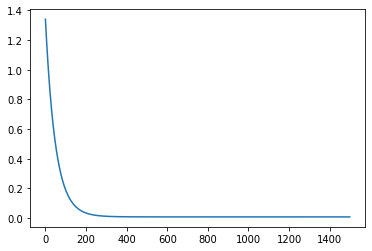

In [1363]:
plt.plot(J_storage)

#### Running Predictions

In [1364]:
pred = predict(dfall_feature_test_1,beta)

##### Testing the model against our 6 features

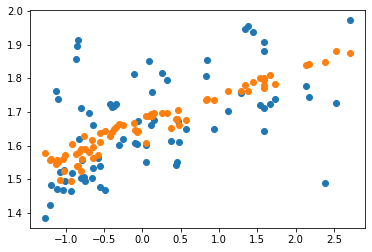

In [1365]:
plt.scatter(dfall_feature_test_1["GDP_normalized"],dfall_target_test_1)
plt.scatter(dfall_feature_test_1["GDP_normalized"],pred)

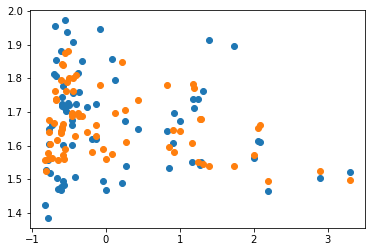

In [1366]:
plt.scatter(dfall_feature_test_1["Agri_land_cap_normalized"],dfall_target_test_1)
plt.scatter(dfall_feature_test_1["Agri_land_cap_normalized"],pred)

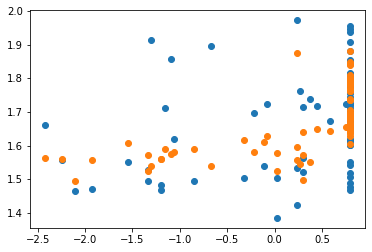

In [1367]:
plt.scatter(dfall_feature_test_1["Basic_water_normalized"],dfall_target_test_1)
plt.scatter(dfall_feature_test_1["Basic_water_normalized"],pred)

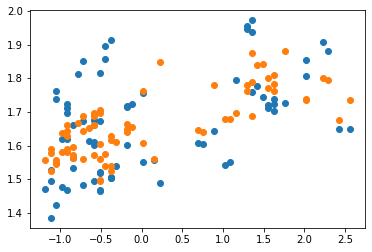

In [1368]:
plt.scatter(dfall_feature_test_1["Eating_disorder_normalized"],dfall_target_test_1)
plt.scatter(dfall_feature_test_1["Eating_disorder_normalized"],pred)

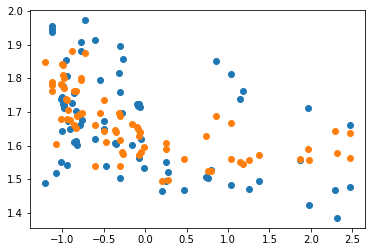

In [1369]:
plt.scatter(dfall_feature_test_1["Employed_%_normalized"],dfall_target_test_1)
plt.scatter(dfall_feature_test_1["Employed_%_normalized"],pred)

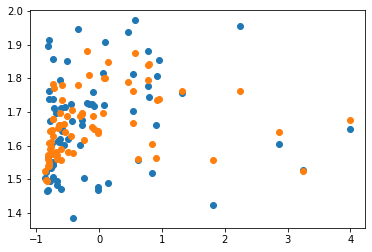

In [1370]:
plt.scatter(dfall_feature_test_1["CO2_agri_normalized"],dfall_target_test_1)
plt.scatter(dfall_feature_test_1["CO2_agri_normalized"],pred)

### Evaluating the $1^{st}$ model
- We will be using Mean Square Error (MSE) with the validation set
$$\large \textrm{MSE} = \frac{1}{n} \sum ^n_{i=1}(y^{i}-\hat y^{i})^2$$

In [1374]:
def mean_squared_error(target, pred):
    n = target.shape[0]
    error = target - pred
    return (1/n)*np.matmul(error.T, error)[0][0]

In [1375]:
target = prepare_target(dfall_target_val_1)
pred = predict(dfall_feature_val_1,beta)
mse_1 = mean_squared_error(target,pred)
print(f"MSE: {mse_1}")

MSE: 0.012411128261247252


### Considering Possible Removal of Features for $1^{st}$ model

- We will be using another metric to verify whether there is a possible relationship between between our features and the target. We decided to use Mean Absolute Error (MAE).
$$\large \textrm{MAE} = \frac{1}{n} \sum |y_i - x_i| %$$

In [1371]:
def mean_absolute_error(df,feature,target):
    x = df[feature].to_numpy()
    y = df[target].to_numpy()
    n = df.shape[0]
    error = np.abs((y-x))
    return (1/n) * (error.sum())

In [1372]:
def mean_absolute_percentage_error(df, feature, target):
    x = df[feature].to_numpy()
    y = df[target].to_numpy()
    n = df.shape[0]
    error = np.abs((y-x)/y)
    return ((1/n) * (error.sum())) / 100

#### Checking the MAE of the normalised data of the 1st Model

In [1373]:
features = ["GDP_normalized","Agri_land_cap_normalized","Basic_water_normalized","Eating_disorder_normalized","Employed_%_normalized","CO2_agri_normalized"]
target = ['y_ratio']

print("MAE Data\n")
for feature in features:
    mae = mean_absolute_error(dfall_normalized_1,feature,target)
    print(f"\t{feature}: {mae}\n")

MAE Data

	GDP_normalized: 426.0910854483676

	Agri_land_cap_normalized: 445.42687381009733

	Basic_water_normalized: 405.34380251487073

	Eating_disorder_normalized: 420.87473933074347

	Employed_%_normalized: 428.2901574876486

	CO2_agri_normalized: 446.3516609168741



- Identify that `Agri_land_cap_normalized` and `CO2_agri_normalised` have the largest MAE and thus the least correlation to the target and will thus be dropped for any optimisations made to our model.

##  $2^{nd}$ Model

- Decided to change `y_ratio` to a new value - Percentage of population with Undernourishment

### Cleaning data for the $2^{nd}$ model

#### Extract Percentage of population undernourished data for the specified year

In [1376]:
# read food supply csv
df_undernourishment = pd.read_csv("DDW_Prevalence of Undernourishment.csv")
# extract values from the specified year
df_undernourishment = df_undernourishment[(df_undernourishment["Year"]==get_year)]
# extract year, country and percent undernourished
df_undernourishment = df_undernourishment[["Year", "Entity", "Prevalence of undernourishment (% of population)"]]
df_undernourishment = df_undernourishment.rename(columns = {"Entity": "Country", "Prevalence of undernourishment (% of population)": "Undernourishment"})
# set index from 0
df_undernourishment = df_undernourishment.reset_index(drop=True)
# find unique countries in percent undernourished
df_undernourishment_countries = df_undernourishment.Country.unique()
# print dataframe
## df_undernourishment

#### Extract GDP, adjusted for PPP, per capita data for the specified year

In [1377]:
# done in Model 1 part
# unique countries
## df_GDP_countries
# print dataframe
## df_GDP

#### Extract total population data for the specified year

In [1378]:
# done in Model 1 part
# unique countries
## df_pop_coutries
# print dataframe
## df_pop

#### Extract land area used for agriculture data for the specified year

In [1379]:
# done in Model 1 part
# unique countries
## df_agri_countries
# print dataframe
## df_agri

#### Extract $CO_{2}$ (in million metric tonnes) data for the specified year

In [1380]:
# done in Model 1 part
# unique countries
## df_co2_countries
# print dataframe
## df_co2

#### Extract basic water drinking services data for the specified year

In [1381]:
# done in Model 1 part
# unique countries
## df_water_countries
# print dataframe
## df_water

#### Extract Eating Disorder data for the specified year

In [1382]:
# done in Model 1 part
# unique countries
## df_disorder_countries
# print dataframe
## df_disorder

#### Extract number of people employed in agriculture data for the specified year

In [1383]:
# done in Model 1 part
# unique countries
## df_employment_countries
# print dataframe
## df_employment

#### Create list of common countries

- Find the countries that we have all the data for as we do not want to use countries with missing values.

In [1384]:
# cc2 represent common countries for model 2
set1_2 = set(df_undernourishment_countries)
set2_2 = set(df_GDP_countries)
set3_2 = set(df_pop_coutries)
set4_2 = set(df_agri_countries)
set5_2 = set(df_co2_countries)
set6_2 = set(df_water_countries)
set7_2 = set(df_disorder_countries)
set8_2 = set(df_employment_countries)

cc2 = list(set1_2 & set2_2 & set3_2 & set4_2 & set5_2 & set6_2 & set7_2 & set8_2)
print("Common Countries", cc2, "\n", "Length", len(cc2))

Common Countries ['Netherlands', 'Costa Rica', 'France', 'Ireland', 'Algeria', 'Georgia', 'Kuwait', 'Slovenia', 'Peru', 'Belarus', 'Portugal', 'Uzbekistan', 'Togo', 'Nepal', 'Jordan', 'Iceland', 'Afghanistan', 'Estonia', 'Denmark', 'Australia', 'Jamaica', 'Belgium', 'Mauritania', 'Cyprus', 'Luxembourg', 'Azerbaijan', 'Canada', 'Samoa', 'Czechia', 'Lithuania', 'El Salvador', 'Dominican Republic', 'Armenia', 'Austria', 'Finland', 'Spain', 'Kazakhstan', 'Mexico', 'Uruguay', 'Rwanda', 'Djibouti', 'Japan', 'South Africa', 'Tunisia', 'Ukraine', 'Switzerland', 'New Zealand', 'Colombia', 'Romania', 'Ghana', 'Norway', 'Hungary', 'Thailand', 'Barbados', 'Israel', 'Sri Lanka', 'Malta', 'Honduras', 'Serbia', 'Cambodia', 'Latvia', 'Sweden', 'Guatemala', 'Belize', 'Chile', 'Bulgaria', 'Philippines', 'Malaysia', 'Mauritius', 'Mongolia', 'Panama', 'Bangladesh', 'United Arab Emirates', 'Germany', 'Albania', 'Italy', 'Ecuador', 'Mali', 'Myanmar', 'Greece', 'Brazil', 'Indonesia', 'Paraguay', 'Bosnia and 

#### Calculating and Combining our dataframes according to our combined countries

- We will start by calculating the necessary dependent values first before we fully combine.

In [1385]:
# extract values from countries in combined countries list
df_agri_cc2 = df_agri[df_agri["Country"].isin(cc2)]
df_pop_cc2 = df_pop[df_pop["Country"].isin(cc2)]

df_agri_pop_2 = df_agri_cc2.copy()
# extract population value
df_agri_pop_2["Total_population"] = list(df_pop_cc2["Population"])
# calculate agriculture land per capita, multiply by 1,000,000 to convert km^2 to m^2
df_agri_pop_2["Agri_land_cap"] = (df_agri_pop_2["Agri_land"]/df_agri_pop_2["Total_population"])*1000000
# set index from 0
df_agri_pop_2 = df_agri_pop_2.reset_index(drop=True)
# print dataframe
## df_agri_pop_2

#### Calculate percentage of population employed in the agriculture industry (%)

In [1386]:
# extract values from countries in combined countries list
df_employment_cc2 = df_employment[df_employment["Country"].isin(cc2)]
df_pop_cc2 = df_pop[df_pop["Country"].isin(cc2)]


df_percent_employed_2 = df_employment_cc2.copy()
# extract population value
df_percent_employed_2["Total_population"] = list(df_pop_cc2["Population"])
# calculate percent employed; (employed number/total population) for each country
df_percent_employed_2["Employed_%"] = (df_percent_employed_2["Employed_num"]/df_percent_employed_2["Total_population"])*100
# set index from 0
df_percent_employed_2 = df_percent_employed_2.reset_index(drop=True)
# print dataframe
## df_percent_employed_2

#### Calculate $CO_{2}$ per agricultural land (kg per $m^{2}$)

In [1387]:
# extract values from countries in combined countries list
df_co2_cc2 = df_co2[df_co2["Country"].isin(cc2)]
df_agri_cc2 = df_agri[df_agri["Country"].isin(cc2)]


df_co2_land_2 = df_co2_cc2.copy()
# extract Agricultural land in km^2
df_co2_land_2["Agri_land"] = list(df_agri_cc2["Agri_land"])
# calculate CO2 per agricultral land; CO2 in MMT, 1 MMT = 1,000,000,000 kg
# 1 km^2 = 1,000,000 m^2; result in kg per m^2
df_co2_land_2["CO2_agri"] = (df_co2_land_2["CO2"]/df_co2_land_2["Agri_land"])*1000
# set index from 0
df_co2_land_2 = df_co2_land_2.reset_index(drop=True)
# print dataframe
## df_co2_land_2

#### Extracting the rest of the dataframes needed by countries that are within the combined countries list

In [1388]:
# extract GDP value from countries in combined countries list
df_GDP_cc2 = df_GDP[df_GDP["Country"].isin(cc2)]
# set index from 0
df_GDP_cc2 = df_GDP_cc2.reset_index(drop=True)

# extract water value from countries in combined countries list
df_water_cc2 = df_water[df_water["Country"].isin(cc2)]
# set index from 0
df_water_cc2 = df_water_cc2.reset_index(drop=True)

# extract eating disorder value from countries in combined countries list
df_disorder_cc2 = df_disorder[df_disorder["Country"].isin(cc2)]
# set index from 0
df_disorder_cc2 = df_disorder_cc2.reset_index(drop=True)

# extract eating disorder value from countries in combined countries list
df_undernourishment_cc2 = df_undernourishment[df_undernourishment["Country"].isin(cc2)]
# set index from 0
df_undernourishment_cc2 = df_undernourishment_cc2.reset_index(drop=True)

# print dataframe to check if need be
# df_GDP_cc2
# df_water_cc2
# df_disorder_cc2
# df_undernourishment_cc2

#### Combining all the variables into one dataframe

In [1389]:
# add country and Y ratio column
dfyears_combined_model2 = df_undernourishment_cc2.loc[:, ["Country", "Undernourishment"]]
# add GDP column
dfyears_combined_model2["GDP"] = df_GDP_cc2.loc[:, "GDP"]
# add agriculture per land column
dfyears_combined_model2["Agri_land_cap"] = df_agri_pop_2.loc[:, "Agri_land_cap"]
# add percent basic water service column
dfyears_combined_model2["Basic_water"] = df_water_cc2.loc[:, "Basic_water"]
# add percent eating disorder column
dfyears_combined_model2["Eating_disorder"] = df_disorder_cc2.loc[:, "Eating_disorder"]
# add percent employed in agriculture column
dfyears_combined_model2["Employed_%"] = df_percent_employed_2.loc[:, "Employed_%"]
# add co2 per agricultural land column
dfyears_combined_model2["CO2_agri"] = df_co2_land_2.loc[:, "CO2_agri"]
# add specified year in the first column
dfyears_combined_model2.insert(0, "Year", get_year)
# set index from 0
dfyears_combined_model2 = dfyears_combined_model2.reset_index(drop=True)
# print dataframe
## dfyears_combined_model2

# export dataframe
# dfyears_combined_model2.to_csv(f"df{get_year}_combined_model2.csv")

#### Combining the dataframes for years 2013 to 2017 into one dataframe

*Year 2013, 2014, 2015, 2016, 2017 was done on seperate occassions and exported to one csv file for each year.

In [1390]:
# read the csv for each year
df2013_combined_model2 = pd.read_csv("df2013_combined_model2.csv")
df2014_combined_model2 = pd.read_csv("df2014_combined_model2.csv")
df2015_combined_model2 = pd.read_csv("df2015_combined_model2.csv")
df2016_combined_model2 = pd.read_csv("df2016_combined_model2.csv")
df2017_combined_model2 = pd.read_csv("df2017_combined_model2.csv")

In [1391]:
# combine all five dataframes into one
dfallyears_combined_2 = pd.concat([df2013_combined_model2, df2014_combined_model2, df2015_combined_model2, df2016_combined_model2, df2017_combined_model2])
# drop the extra column caused due to concat function
dfallyears_combined_2 = dfallyears_combined_2.drop(columns = "Unnamed: 0")
# set index from 0
dfallyears_combined_2 = dfallyears_combined_2.reset_index(drop=True)
# print dataframe
## dfallyears_combined_2

# export dataframe
# dfallyears_combined.to_csv("dfallyears_combined_model2.csv")
## dfallyears_combined_2

,Year,Country,Undernourishment,GDP,Agri_land_cap,Basic_water,Eating_disorder,Employed_%,CO2_agri
0,2013,Albania,3.9,11361.3,4.088797e+03,92.6,0.14,15.527752,0.415059
1,2013,Algeria,3.1,11319.1,3.223308e+04,93.0,0.22,2.991599,0.107726
2,2013,Argentina,2.8,24424.1,3.988526e+02,98.9,0.35,0.159302,11.297267
3,2013,Armenia,3.3,10691.3,1.283048e+06,99.0,0.13,14.568022,0.001489
4,2013,Australia,2.5,46744.6,1.168097e+03,99.0,1.10,1.286984,14.473973
...,...,...,...,...,...,...,...,...,...
422,2017,Tunisia,2.5,11234.5,3.628742e+04,96.0,0.22,4.459936,0.070455
423,2017,Ukraine,2.5,11860.6,3.197040e+03,93.8,0.13,5.595703,1.568492
424,2017,United Arab Emirates,3.2,67183.6,2.691330e+04,99.0,0.31,0.694166,0.661221
425,2017,Uruguay,2.5,23009.9,1.804085e+02,99.0,0.38,4.181898,9.940323


#### List of countries left after removal of countries with outliers

- Calls function _identify_upper_lower_ defined in model 1 that returns upper and lower limit

In [1392]:
# identifier limit for each factor
GDP_limit = identify_upper_lower(dfallyears_combined_2, "GDP")
Agri_cap_limit = identify_upper_lower(dfallyears_combined_2, "Agri_land_cap")
Water_limit = identify_upper_lower(dfallyears_combined_2, "Basic_water")
Eating_limit = identify_upper_lower(dfallyears_combined_2, "Eating_disorder")
Employed_limit = identify_upper_lower(dfallyears_combined_2, "Employed_%")
CO2_limit = identify_upper_lower(dfallyears_combined_2, "CO2_agri")

# removal of rows with outliers
dfall_clean_2 = dfallyears_combined_2.copy()
# remove GDP outlier
dfall_clean_2 = dfall_clean_2.loc[(dfall_clean_2["GDP"] <= GDP_limit[0]) & (dfall_clean_2["GDP"] >= GDP_limit[1]), :]
# remove Agriculture land per capita outlier
dfall_clean_2 = dfall_clean_2.loc[(dfall_clean_2["Agri_land_cap"] <= Agri_cap_limit[0]) & (dfall_clean_2["Agri_land_cap"] >= Agri_cap_limit[1]), :]
# remove basic water outlier
dfall_clean_2 = dfall_clean_2.loc[(dfall_clean_2["Basic_water"] <= Water_limit[0]) & (dfall_clean_2["Basic_water"] >= Water_limit[1]), :]
# remove eating disorder outlier
dfall_clean_2 = dfall_clean_2.loc[(dfall_clean_2["Eating_disorder"] <= Eating_limit[0]) & (dfall_clean_2["Eating_disorder"] >= Eating_limit[1]), :]
# remove percentage employed outlier
dfall_clean_2 = dfall_clean_2.loc[(dfall_clean_2["Employed_%"] <= Employed_limit[0]) & (dfall_clean_2["Employed_%"] >= Employed_limit[1]), :]
# remove CO2 emitted per agricultural land outlier
dfall_clean_2 = dfall_clean_2.loc[(dfall_clean_2["CO2_agri"] <= CO2_limit[0]) & (dfall_clean_2["CO2_agri"] >= CO2_limit[1]), :]
# print dataframe
## dfall_clean_2

#### Standardization
- Calls function _normalize_z_ defined in model 1.

In [1393]:
dfall_normalized_2 = dfall_clean_2.copy()
# standardize GDP
dfall_normalized_2["GDP_normalized"] = normalize_z(dfall_normalized_2["GDP"])
# standardize agricultural land per capita
dfall_normalized_2["Agri_land_cap_normalized"] = normalize_z(dfall_normalized_2["Agri_land_cap"])
# standardize basic water service
dfall_normalized_2["Basic_water_normalized"] = normalize_z(dfall_normalized_2["Basic_water"])
# standardize eating disorder
dfall_normalized_2["Eating_disorder_normalized"] = normalize_z(dfall_normalized_2["Eating_disorder"])
# standardize percentage employed
dfall_normalized_2["Employed_%_normalized"] = normalize_z(dfall_normalized_2["Employed_%"])
# standardize CO2 emitted per agricultural land
dfall_normalized_2["CO2_agri_normalized"] = normalize_z(dfall_normalized_2["CO2_agri"])
# dfall_normalized_2.to_csv("dfallyears_normalized_model2.csv")
## dfall_normalized_2

### Repeating Steps above to train the $2^{nd}$ Model

In [1394]:
features = ["GDP_normalized","Agri_land_cap_normalized","Basic_water_normalized","Eating_disorder_normalized","Employed_%_normalized","CO2_agri_normalized"]
target = ["Undernourishment"]
dfallyears_feature_model2 , dfallyears_target_model2 = get_features_targets(dfall_normalized_2,features,target)
# # df2017_feature is already normalised
# # df2017_target was not normalised above
display(dfallyears_feature_model2.describe())
display(dfallyears_target_model2.describe())


,GDP_normalized,Agri_land_cap_normalized,Basic_water_normalized,Eating_disorder_normalized,Employed_%_normalized,CO2_agri_normalized
count,2.450000e+02,2.450000e+02,2.450000e+02,2.450000e+02,2.450000e+02,2.450000e+02
mean,2.302013e-16,1.305078e-16,2.610157e-16,-3.770227e-16,-1.558844e-16,-1.522592e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.302248e+00,-8.211407e-01,-2.821641e+00,-1.211759e+00,-1.202402e+00,-8.568418e-01
25%,-8.168614e-01,-6.152638e-01,-8.620888e-01,-7.501494e-01,-8.356285e-01,-6.839477e-01
50%,-3.431222e-01,-4.856366e-01,6.075755e-01,-4.204282e-01,-2.995495e-01,-4.263990e-01
75%,5.805865e-01,1.692810e-01,7.825356e-01,1.030345e+00,7.598087e-01,4.142329e-01
max,2.617562e+00,3.724726e+00,7.825356e-01,2.481119e+00,2.569292e+00,3.889008e+00


,Undernourishment
count,245.000000
mean,4.854286
std,3.590646
min,2.500000
25%,2.500000
50%,2.500000
75%,6.900000
max,17.700001


In [1395]:
# sns.set()
# myplot = sns.pairplot(data=dfall_normalized_2)

In [1396]:
dfallyears_new_feature_train , dfallyears_new_feature_test ,dfallyears_new_target_train , dfallyears_new_target_test = split_data(dfallyears_feature_model2,dfallyears_target_model2,test_size=0.3)
dfallyears_new_feature_train , dfallyears_new_feature_val , dfallyears_new_target_train , dfallyears_new_target_val = split_data(dfallyears_new_feature_train,dfallyears_new_target_train,test_size=0.3)

/var/folders/2b/1n3vmx9n6xj9kyxht8yl9bl80000gn/T/ipykernel_97642/730328389.py:33: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_feature_train = df_feature.loc[train_index,:]
/var/folders/2b/1n3vmx9n6xj9kyxht8yl9bl80000gn/T/ipykernel_97642/730328389.py:34: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_feature_test = df_feature.loc[test_index,:]
/var/folders/2b/1n3vmx9n6xj9kyxht8yl9bl80000gn/T/ipykernel_97642/730328389.py:36: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_target_train = df_target.loc[train_index,:]
/var/folders/2b/1n3vmx9n6xj9kyxht8yl9bl80000gn/T/ipykernel_97642/730328389.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_target_test = df_target.loc[test_index,:]
/var/folders/2b/1n3vmx9n

In [1397]:
X = prepare_feature(dfallyears_new_feature_train)
target = prepare_target(dfallyears_new_target_train)

beta = np.zeros((7,1))
J = compute_cost(X,target,beta)
print(J)

beta = np.ones((7,1))
J = compute_cost(X, target, beta)
print(J)

[[21.68719033]]
[[26.64197325]]


In [1398]:
iterations = 1500 # arbitrary value
alpha = 0.01 # arbitrary value
beta = np.zeros((7,1))

beta , J_storage = gradient_descent(X,target,beta,alpha,iterations)
print(beta)

[[ 4.70447696]
 [-1.50780649]
 [-1.2887913 ]
 [-1.40481446]
 [ 0.71855963]
 [ 0.14513068]
 [-0.75769877]]


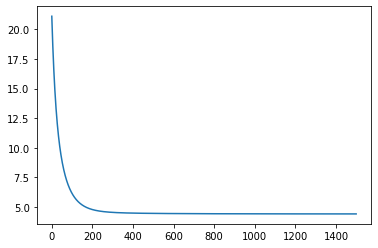

In [1399]:
plt.plot(J_storage)

In [1400]:
pred = predict(dfallyears_new_feature_test,beta)

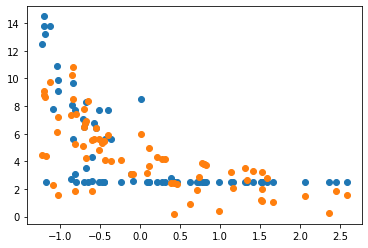

In [1401]:
plt.scatter(dfallyears_new_feature_test["GDP_normalized"],dfallyears_new_target_test)
plt.scatter(dfallyears_new_feature_test["GDP_normalized"],pred)

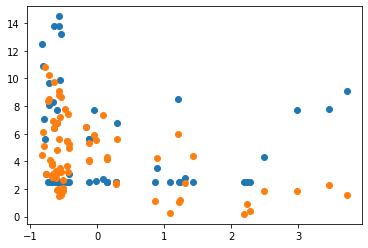

In [1402]:
plt.scatter(dfallyears_new_feature_test["Agri_land_cap_normalized"],dfallyears_new_target_test)
plt.scatter(dfallyears_new_feature_test["Agri_land_cap_normalized"],pred)

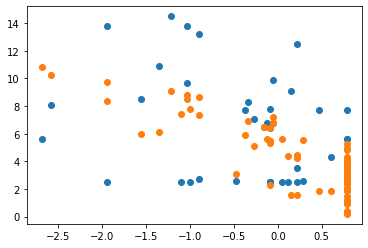

In [1403]:
plt.scatter(dfallyears_new_feature_test["Basic_water_normalized"],dfallyears_new_target_test)
plt.scatter(dfallyears_new_feature_test["Basic_water_normalized"],pred)

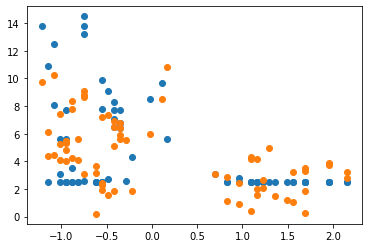

In [1404]:
plt.scatter(dfallyears_new_feature_test["Eating_disorder_normalized"],dfallyears_new_target_test)
plt.scatter(dfallyears_new_feature_test["Eating_disorder_normalized"],pred)

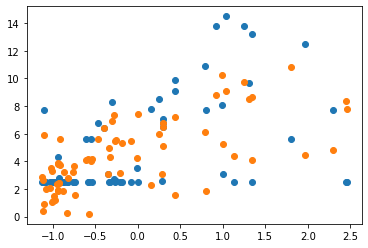

In [1405]:
plt.scatter(dfallyears_new_feature_test["Employed_%_normalized"],dfallyears_new_target_test)
plt.scatter(dfallyears_new_feature_test["Employed_%_normalized"],pred)

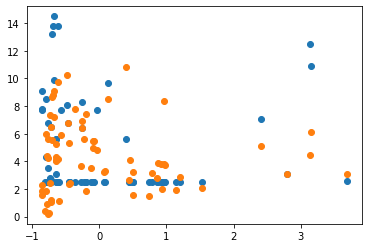

In [1406]:
plt.scatter(dfallyears_new_feature_test["CO2_agri_normalized"],dfallyears_new_target_test)
plt.scatter(dfallyears_new_feature_test["CO2_agri_normalized"],pred)

### Considering Possible Removal of Features for $2^{nd}$ model

#### Mean Absolute Errors of 6 factors against Prevalence of Undernourishment

In [1408]:
features = ["GDP_normalized","Agri_land_cap_normalized","Basic_water_normalized","Eating_disorder_normalized","Employed_%_normalized","CO2_agri_normalized"]
target = ['Undernourishment']


print("MAE Data\n")
for feature in features:
    mae = mean_absolute_error(dfall_normalized_2,feature,target)
    print(f"\t{feature}: {mae}\n")

MAE Data

	GDP_normalized: 1189.5060533538485

	Agri_land_cap_normalized: 1195.0698046773887

	Basic_water_normalized: 1189.3000030517578

	Eating_disorder_normalized: 1189.3000030517583

	Employed_%_normalized: 1189.3718402223378

	CO2_agri_normalized: 1198.4244873849484



### Model Evaluation using MSE for the $2^{nd}$ Model

- Also done with **Validation Set** to make sure that there is less bias from testing with the train set.

In [1407]:
target = prepare_target(dfallyears_new_target_val)
pred = predict(dfallyears_new_feature_val,beta)
mse_2 = mean_squared_error(target,pred)

print(f"MSE: {mse_2}")

MSE: 5.652435642897357


- Since the MSE of the $2^{nd}$ model is a lot higher than the previous model, we will not be proceeding with the $2^{nd}$ model.

- This means we will not be using the MAE data for this model.

## $3^{rd}$ Model

- Optimised version of Model 1

- Since the MSE for the 2nd model is higher, we will be using the 1st model to optimise for our 3rd model

- We identified in model 1 that `Agri_land_cap_normalized` and `CO2_agri_normalized` have the largest MAE and thus the least correlation to the target and will thus be dropped for the 3rd model.

### Cleaning the data for $3^{rd}$ Model

#### Extract fat and protein supplied for the specified year

In [1409]:
# read fat and protein supply csv
df_f_p = pd.read_csv("DDW_Fat and Protein Supply.csv")
# rename column name and value within "Year" column
df_f_p = df_f_p.rename(columns = {"Area": "Country"})
df_f_p = df_f_p.replace({"Average protein supply (g/cap/day) (3-year average)": "Protein", "Average fat supply (g/cap/day) (3-year average)": "Fat"})
df_f_p = df_f_p.replace({"2011-2013": 2012, "2012-2014": 2013, "2013-2015": 2014, "2014-2016": 2015, "2015-2017": 2016, "2016-2018": 2017})

In [1410]:
# extract values only when item is protein
df_protein = df_f_p[(df_f_p["Item"] == "Protein")]
# extract values for the specified year
df_protein = df_protein[(df_protein["Year"]==get_year)]
# extract year, country and food supply
df_protein = df_protein[["Year", "Country", "Value"]]
df_protein = df_protein.rename(columns = {"Value": "Protein"})
# drop rows with no value (NaN)
df_protein = df_protein.dropna()
# set index from 0
df_protein = df_protein.reset_index(drop=True)
# find unique countries in protein data
df_protein_countries = df_protein.Country.unique()
# print dataframe
## df_protein

In [1411]:
# extract values only when item is fat
df_fat = df_f_p[(df_f_p["Item"] == "Fat")]
# extract values for the specified year
df_fat = df_fat[(df_fat["Year"]==get_year)]
# extract year, country and food supply
df_fat = df_fat[["Year", "Country", "Value"]]
df_fat = df_fat.rename(columns = {"Value": "Fat"})
# drop rows with no value (NaN)
df_fat = df_fat.dropna()
# set index from 0
df_fat = df_fat.reset_index(drop=True)
# find unique countries in fat data
df_fat_countries = df_fat.Country.unique()
# print dataframe
## df_fat

#### Extract calories supplied data for the specified year

In [1412]:
# done in Model 1 part
# find unique countries in calories supply data
df_calories_countries = df_calories.Country.unique()
# print dataframe
## df_calories

#### Extract minimum calorie intake required data for the specified year

In [1413]:
# done in Model 1 part
# find unique countries in miniumum calorie intake required data
df_min_cal_countries = df_min_cal.Country.unique()
# print dataframe
## df_min_cal

#### Extract GDP, adjusted for PPP, per capita data for the specified year

In [1414]:
# done in Model 1 part
# unique countries
## df_GDP_countries
# print dataframe
## df_GDP

#### Extract total population data for the specified year

In [1415]:
# done in Model 1 part
# unique countries
## df_pop_coutries
# print dataframe
## df_pop

#### Extract basic water drinking services data for the specified year

In [1416]:
# done in Model 1 part
# unique countries
## df_water_countries
# print dataframe
## df_water

#### Extract Eating Disorder data for the specified year

In [1417]:
# done in Model 1 part
# unique countries
## df_disorder_countries
# print dataframe
## df_disorder

#### Extract number of people employed in agriculture data for the specified year

In [1418]:
# done in Model 1 part
# unique countries
## df_employment_countries
# print dataframe
## df_employment

#### Create list of common countries

Find the countries that we have all the data for as we do not want to use countries with missing values.

In [1419]:
set1_3 = set(df_undernourishment_countries)
set2_3 = set(df_fat_countries)
set3_3 = set(df_protein_countries)
set4_3 = set(df_calories_countries)
set5_3 = set(df_GDP_countries)
set6_3 = set(df_pop_coutries)
set7_3 = set(df_water_countries)
set8_3 = set(df_employment_countries)
set9_3 = set(df_disorder_countries)
set10_3 = set(df_min_cal_countries)

cc3 = list(set1_3 & set2_3 & set3_3 & set4_3 & set5_3 & set6_3 & set7_3 & set8_3 & set9_3 & set10_3)
print("Common Countries", cc3, "\n", "Length", len(cc3))

Common Countries ['Netherlands', 'Costa Rica', 'France', 'Ireland', 'Algeria', 'Georgia', 'Kuwait', 'Kyrgyzstan', 'Slovenia', 'Peru', 'Belarus', 'Portugal', 'Uzbekistan', 'Togo', 'Nepal', 'Jordan', 'Iceland', 'Afghanistan', 'Estonia', 'Denmark', 'Australia', 'Jamaica', 'Belgium', 'Mauritania', 'Cyprus', 'Luxembourg', 'Azerbaijan', 'Canada', 'Samoa', 'Czechia', 'Lithuania', 'El Salvador', 'Dominican Republic', 'Armenia', 'Austria', 'Finland', 'Spain', 'Kazakhstan', 'Mexico', 'Uruguay', 'Rwanda', 'Djibouti', 'Japan', 'Slovakia', 'Egypt', 'South Africa', 'Tunisia', 'Ukraine', 'Switzerland', 'New Zealand', 'Colombia', 'Romania', 'Ghana', 'Norway', 'Hungary', 'Thailand', 'Barbados', 'Israel', 'Sri Lanka', 'Malta', 'Honduras', 'Serbia', 'Cambodia', 'Latvia', 'Sweden', 'Guatemala', 'Belize', 'Chile', 'Bulgaria', 'Philippines', 'Malaysia', 'Mauritius', 'Mongolia', 'Panama', 'Bangladesh', 'United Arab Emirates', 'Germany', 'Albania', 'Italy', 'Ecuador', 'Mali', 'Myanmar', 'Greece', 'Brazil', 'I

#### Calculating and Combining our dataframes according to our combined countries

We will start by calculating the necessary dependent values first before we fully combine.

#### Calculate Y ratio 
$$
\frac{\text{Daily calories supplied (kcal/capita day)}}{\text{Minimum calories required (kcal/capita day)}}
$$

In [1420]:
# extract values from countries in combined countries list
df_calories_cc3 = df_calories[df_calories["Country"].isin(cc3)]
df_min_cal_cc3 = df_min_cal[df_min_cal["Country"].isin(cc3)]

df_y_ratio_3 = df_calories_cc3.copy()
# extract minimum calorie value
df_y_ratio_3["Mininum_calorie_intake"] = list(df_min_cal_cc3["Mininum_calorie_intake"])
# calculate Y ratio based on stated equation
df_y_ratio_3["y_ratio"] = df_y_ratio_3["Calories_supply"]/df_y_ratio_3["Mininum_calorie_intake"]
# set index from 0
df_y_ratio_3 = df_y_ratio_3.reset_index(drop=True)
# print dataframe
## df_y_ratio_3

#### Calculate Carbohydrate supplied (g/capita day)

We can easily calculate the carbohydrate supplied using
$$
\small \text{Carbohydate Supplied} = \frac{\text{Energy supplied - (Protein supplied * 4) - (Fat supplied * 9 )}}{\text{4}}
$$
- 1g of Carbohydrate = 4 kcal
- 1g of Protein = 4 kcal
- 1g of Fat = 9 kcal

In [1421]:
# extract values from countries in combined countries list
df_protein_cc3 = df_protein[df_protein["Country"].isin(cc3)]
df_fat_cc3 = df_fat[df_fat["Country"].isin(cc3)]
df_calories_cc3 = df_calories[df_calories["Country"].isin(cc3)]

df_carb_cc3 = df_protein_cc3.copy()
# extract Fat value
df_carb_cc3["Fat"] = list(df_fat_cc3["Fat"])
# extract Calories supply value
df_carb_cc3["Total_calories"] = list(df_calories_cc3["Calories_supply"])
# calculate carbohydrate in (g/capita day)
df_carb_cc3["Carbohydrate"] = (df_carb_cc3["Total_calories"] - 9*df_carb_cc3["Fat"] - 4*df_carb_cc3["Protein"])/4
# set index from 0
df_carb_cc3 = df_carb_cc3.reset_index(drop=True)
# print dataframe
## df_carb_cc3

#### Calculate percentage of population employed in the agriculture industry (%)

In [1422]:
# extract values from countries in combined countries list
df_employment_cc3 = df_employment[df_employment["Country"].isin(cc3)]
df_pop_cc3 = df_pop[df_pop["Country"].isin(cc3)]


df_percent_employed_3 = df_employment_cc3.copy()
# extract population value
df_percent_employed_3["Total_population"] = list(df_pop_cc3["Population"])
# calculate percent employed; (employed number/total population) for each country
df_percent_employed_3["Employed_%"] = (df_percent_employed_3["Employed_num"]/df_percent_employed_3["Total_population"])*100
# set index from 0
df_percent_employed_3 = df_percent_employed_3.reset_index(drop=True)
# print dataframe
## df_percent_employed_3

#### Extracting the rest of the dataframes needed by countries that are within the combined countries list

In [1423]:
# extract GDP value from countries in combined countries list
df_GDP_cc3 = df_GDP[df_GDP["Country"].isin(cc3)]
# set index from 0
df_GDP_cc3 = df_GDP_cc3.reset_index(drop=True)

# extract water value from countries in combined countries list
df_water_cc3 = df_water[df_water["Country"].isin(cc3)]
# set index from 0
df_water_cc3 = df_water_cc3.reset_index(drop=True)

# extract eating disorder value from countries in combined countries list
df_disorder_cc3 = df_disorder[df_disorder["Country"].isin(cc3)]
# set index from 0
df_disorder_cc3 = df_disorder_cc3.reset_index(drop=True)

# print dataframe to check if need be
# df_GDP_cc3
# df_water_cc3
# df_disorder_cc3

#### Combining all the variables into one dataframe

In [1424]:
# add country and Y ratio column
dfyears_combined_model3 = df_y_ratio_3.loc[:, ["Country", "y_ratio"]]
# add GDP column
dfyears_combined_model3["GDP"] = df_GDP_cc3.loc[:, "GDP"]
# add percent basic water service column
dfyears_combined_model3["Basic_water"] = df_water_cc3.loc[:, "Basic_water"]
# add percent eating disorder column
dfyears_combined_model3["Eating_disorder"] = df_disorder_cc3.loc[:, "Eating_disorder"]
# add percent employed in agriculture column
dfyears_combined_model3["Employed_%"] = df_percent_employed_3.loc[:, "Employed_%"]
# add fat supplied column
dfyears_combined_model3["Fat"] = df_carb_cc3.loc[:, "Fat"]
# add protein supplied column
dfyears_combined_model3["Protein"] = df_carb_cc3.loc[:, "Protein"]
# add carbohydrate supplied column
dfyears_combined_model3["Carbohydrate"] = df_carb_cc3.loc[:, "Carbohydrate"]
# add specified year in the first column
dfyears_combined_model3.insert(0, "Year", get_year)
# set index from 0
dfyears_combined_model3 = dfyears_combined_model3.reset_index(drop=True)
# print dataframe
## dfyears_combined_model3

# export dataframe
# dfyears_combined_model3.to_csv(f"df{get_year}_combined_model3.csv")

#### Combining the dataframes for years 2013 to 2017 into one dataframe

- Year 2013, 2014, 2015, 2016, 2017 was done on seperate occassions and exported to one csv file for each year.

In [1425]:
# read the csv for each year
df2013_combined_model3 = pd.read_csv("df2013_combined_model3.csv")
df2014_combined_model3 = pd.read_csv("df2014_combined_model3.csv")
df2015_combined_model3 = pd.read_csv("df2015_combined_model3.csv")
df2016_combined_model3 = pd.read_csv("df2016_combined_model3.csv")
df2017_combined_model3 = pd.read_csv("df2017_combined_model3.csv")

In [1426]:
# combine all five dataframes into one
dfallyears_combined_3 = pd.concat([df2013_combined_model3, df2014_combined_model3, df2015_combined_model3, df2016_combined_model3, df2017_combined_model3])
# drop the extra column caused due to concat function
dfallyears_combined_3 = dfallyears_combined_3.drop(columns = "Unnamed: 0")
# set index from 0
dfallyears_combined_3 = dfallyears_combined_3.reset_index(drop=True)
# print dataframe
## dfallyears_combined_3

# export dataframe
# dfallyears_combined.to_csv("dfallyears_combined_model3.csv")
## dfallyears_combined_3

#### List of countries left after removal of countries with outliers

Calls function _identify_upper_lower_ defined in model 1 that returns upper and lower limit

In [1427]:
# identifier limit for each factor
GDP_limit = identify_upper_lower(dfallyears_combined_3, "GDP")
Water_limit = identify_upper_lower(dfallyears_combined_3, "Basic_water")
Eating_limit = identify_upper_lower(dfallyears_combined_3, "Eating_disorder")
Employed_limit = identify_upper_lower(dfallyears_combined_3, "Employed_%")
Fat_limit = identify_upper_lower(dfallyears_combined_3, "Fat")
Protein_limit = identify_upper_lower(dfallyears_combined_3, "Protein")
Carbohydrate_limit = identify_upper_lower(dfallyears_combined_3, "Carbohydrate")

# removal of rows with outliers
dfall_clean_3 = dfallyears_combined_3.copy()
# remove GDP outlier
dfall_clean_3 = dfall_clean_3.loc[(dfall_clean_3["GDP"] <= GDP_limit[0]) & (dfall_clean_3["GDP"] >= GDP_limit[1]), :]
# remove basic water outlier
dfall_clean_3 = dfall_clean_3.loc[(dfall_clean_3["Basic_water"] <= Water_limit[0]) & (dfall_clean_3["Basic_water"] >= Water_limit[1]), :]
# remove eating disorder outlier
dfall_clean_3 = dfall_clean_3.loc[(dfall_clean_3["Eating_disorder"] <= Eating_limit[0]) & (dfall_clean_3["Eating_disorder"] >= Eating_limit[1]), :]
# remove percentage employed outlier
dfall_clean_3 = dfall_clean_3.loc[(dfall_clean_3["Employed_%"] <= Employed_limit[0]) & (dfall_clean_3["Employed_%"] >= Employed_limit[1]), :]
# remove fat outlier
dfall_clean_3 = dfall_clean_3.loc[(dfall_clean_3["Fat"] <= Fat_limit[0]) & (dfall_clean_3["Fat"] >= Fat_limit[1]), :]
# remove protein outlier
dfall_clean_3 = dfall_clean_3.loc[(dfall_clean_3["Protein"] <= Protein_limit[0]) & (dfall_clean_3["Protein"] >= Protein_limit[1]), :]
# remove carbohydrate outlier
dfall_clean_3 = dfall_clean_3.loc[(dfall_clean_3["Carbohydrate"] <= Carbohydrate_limit[0]) & (dfall_clean_3["Carbohydrate"] >= Carbohydrate_limit[1]), :]
# set index from 0
dfall_clean_3 = dfall_clean_3.reset_index(drop=True)
# print dataframe
## dfall_clean_3

#### Standardization

Calls function _normalize_z_ defined in model 1.

In [1428]:
dfall_normalized_3 = dfall_clean_3.copy()
# standardize GDP
dfall_normalized_3["GDP_normalized"] = normalize_z(dfall_normalized_3["GDP"])
# standardize basic water service
dfall_normalized_3["Basic_water_normalized"] = normalize_z(dfall_normalized_3["Basic_water"])
# standardize eating disorder
dfall_normalized_3["Eating_disorder_normalized"] = normalize_z(dfall_normalized_3["Eating_disorder"])
# standardize percentage employed
dfall_normalized_3["Employed_%_normalized"] = normalize_z(dfall_normalized_3["Employed_%"])
# standardize fat supplied
dfall_normalized_3["Fat_normalized"] = normalize_z(dfall_normalized_3["Fat"])
# standardize protein supplied
dfall_normalized_3["Protein_normalized"] = normalize_z(dfall_normalized_3["Protein"])
# standardize carbohydrate supplied
dfall_normalized_3["Carbohydrate_normalized"] = normalize_z(dfall_normalized_3["Carbohydrate"])
# dfall_normalized_3.to_csv("dfallyears_normalized_model3.csv")
## dfall_normalized_3

### Justifying the addition of the new features using correlation of the $3^{rd}$ model using MAE

In [1429]:
features = ["GDP_normalized","Basic_water_normalized","Eating_disorder_normalized","Employed_%_normalized","Fat_normalized","Protein_normalized","Carbohydrate_normalized"]
target = ['y_ratio']

print("MAE Data\n")
for feature in features:
    mae = mean_absolute_error(dfall_normalized_3,feature,target)
    print(f"\t{feature}: {mae}\n")

MAE Data

	GDP_normalized: 644.5699300325963

	Basic_water_normalized: 619.3736953831456

	Eating_disorder_normalized: 642.5923852332563

	Employed_%_normalized: 660.5119094150526

	Fat_normalized: 626.4907090466677

	Protein_normalized: 635.050640886055

	Carbohydrate_normalized: 643.6756325982291



- Since we have deemed that the first 4 features listed above show a good correlation with the `y_ratio`, and with the added features of `Fat_normalized`, `Protein_normalized` and `Carbohydrate_normalized` having a MAE that is less than the highest MAE of the first 4 features, we have decided to keep the added features.

### Repeating Steps to train $3^{rd}$ Model

In [1431]:
features = ["GDP_normalized","Basic_water_normalized","Eating_disorder_normalized","Employed_%_normalized","Fat_normalized","Protein_normalized","Carbohydrate_normalized"]
target = ["y_ratio"]
dfallyears_feature_model3 , dfallyears_target_model3 = get_features_targets(dfall_normalized_3,features,target)
# # df2017_feature is already normalised
# # df2017_target was not normalised above
display(dfallyears_feature_model3.describe())
display(dfallyears_target_model3.describe())

,GDP_normalized,Basic_water_normalized,Eating_disorder_normalized,Employed_%_normalized,Fat_normalized,Protein_normalized,Carbohydrate_normalized
count,3.760000e+02,3.760000e+02,3.760000e+02,3.760000e+02,3.760000e+02,3.760000e+02,3.760000e+02
mean,-1.700767e-16,3.751137e-15,-2.503907e-16,-2.055094e-16,2.763747e-16,7.240071e-16,7.665263e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.366308e+00,-3.150206e+00,-1.226600e+00,-1.097637e+00,-2.443745e+00,-1.958267e+00,-2.522038e+00
25%,-8.410209e-01,-5.921992e-01,-7.785828e-01,-7.933169e-01,-6.745382e-01,-6.908960e-01,-6.489563e-01
50%,-2.364866e-01,6.186443e-01,-3.945682e-01,-2.934817e-01,-1.554105e-01,-8.902793e-03,-1.258199e-01
75%,7.296495e-01,7.309079e-01,9.014811e-01,4.788368e-01,8.491457e-01,7.910184e-01,5.980194e-01
max,2.768003e+00,7.309079e-01,2.485541e+00,3.358875e+00,2.004546e+00,3.003234e+00,2.581051e+00


,y_ratio
count,376.000000
mean,1.647270
std,0.141525
min,1.382235
25%,1.521701
50%,1.647211
75%,1.750075
max,2.008989


In [1432]:
dfallyears_feature_train_model3 , dfallyears_feature_test_model3 ,dfallyears_target_train_model3 , dfallyears_target_test_model3 = split_data(dfallyears_feature_model3,dfallyears_target_model3,test_size=0.3)
dfallyears_feature_train_model3 , dfallyears_feature_val_model3 , dfallyears_target_train_model3 , dfallyears_target_val_model3 = split_data(dfallyears_feature_train_model3,dfallyears_target_train_model3,test_size=0.3)

/var/folders/2b/1n3vmx9n6xj9kyxht8yl9bl80000gn/T/ipykernel_97642/730328389.py:33: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_feature_train = df_feature.loc[train_index,:]
/var/folders/2b/1n3vmx9n6xj9kyxht8yl9bl80000gn/T/ipykernel_97642/730328389.py:34: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_feature_test = df_feature.loc[test_index,:]
/var/folders/2b/1n3vmx9n6xj9kyxht8yl9bl80000gn/T/ipykernel_97642/730328389.py:36: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_target_train = df_target.loc[train_index,:]
/var/folders/2b/1n3vmx9n6xj9kyxht8yl9bl80000gn/T/ipykernel_97642/730328389.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_target_test = df_target.loc[test_index,:]
/var/folders/2b/1n3vmx9n

In [1433]:
X = prepare_feature(dfallyears_feature_train_model3)
target = prepare_target(dfallyears_target_train_model3)

beta = np.zeros((8,1))
J = compute_cost(X,target,beta)
print(J)

beta = np.ones((8,1))
J = compute_cost(X, target, beta)
print(J)

[[1.36113447]]
[[5.96680042]]


In [1441]:
iterations = 1500 # arbitrary value
alpha = 0.01 # arbitrary value
beta = np.zeros((8,1))

beta , J_storage = gradient_descent(X,target,beta,alpha,iterations)
print(beta)

[[ 1.64854444]
 [-0.02030515]
 [-0.01567083]
 [ 0.01101713]
 [-0.00264773]
 [ 0.11344508]
 [ 0.0455391 ]
 [ 0.07855615]]


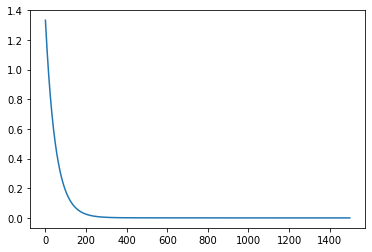

In [1449]:
plt.plot(J_storage)

In [1457]:
pred = predict(dfallyears_feature_test_model3,beta)

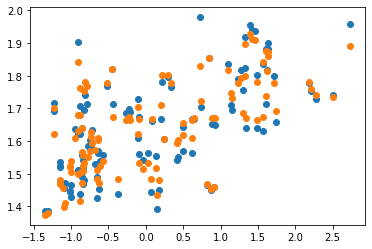

In [1458]:
plt.scatter(dfallyears_feature_test_model3["GDP_normalized"],dfallyears_target_test_model3)
plt.scatter(dfallyears_feature_test_model3["GDP_normalized"],pred)

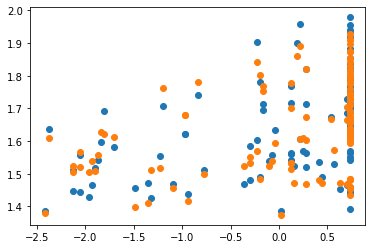

In [1466]:
plt.scatter(dfallyears_feature_test_model3["Basic_water_normalized"],dfallyears_target_test_model3)
plt.scatter(dfallyears_feature_test_model3["Basic_water_normalized"],pred)

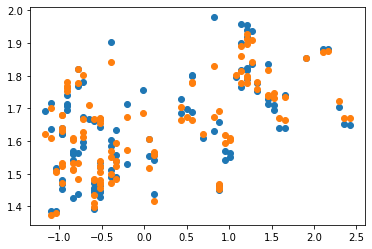

In [1467]:
plt.scatter(dfallyears_feature_test_model3["Eating_disorder_normalized"],dfallyears_target_test_model3)
plt.scatter(dfallyears_feature_test_model3["Eating_disorder_normalized"],pred)

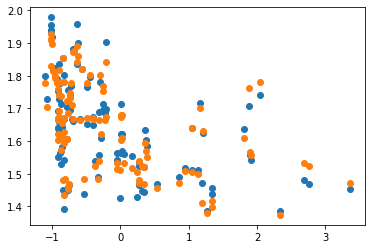

In [1468]:
plt.scatter(dfallyears_feature_test_model3["Employed_%_normalized"],dfallyears_target_test_model3)
plt.scatter(dfallyears_feature_test_model3["Employed_%_normalized"],pred)

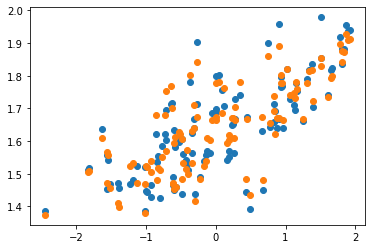

In [1469]:
plt.scatter(dfallyears_feature_test_model3["Fat_normalized"],dfallyears_target_test_model3)
plt.scatter(dfallyears_feature_test_model3["Fat_normalized"],pred)

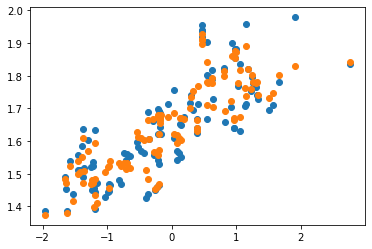

In [1470]:
plt.scatter(dfallyears_feature_test_model3["Protein_normalized"],dfallyears_target_test_model3)
plt.scatter(dfallyears_feature_test_model3["Protein_normalized"],pred)

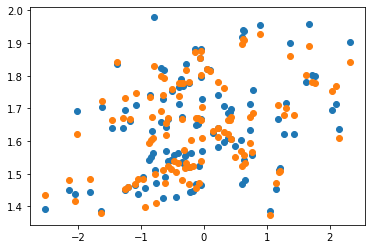

In [1471]:
plt.scatter(dfallyears_feature_test_model3["Carbohydrate_normalized"],dfallyears_target_test_model3)
plt.scatter(dfallyears_feature_test_model3["Carbohydrate_normalized"],pred)

### Model Evaluation for Model 3 using MSE

- Done with **Validation Set**

In [1479]:
target = prepare_target(dfallyears_target_val_model3)
pred = predict(dfallyears_feature_val_model3,beta)
mse_3 = mean_squared_error(target,pred)
print(f"MSE: {mse_3}")

MSE: 0.0013097934843455642


## Conclusion

Discuss your model and accuracy in solving the problem. Analyze the results of your metrics. Put any conclusion here.